---

# Neighbors and Incident Edges

The most fundamental concept in graph theory and network science is that of **neighbors** and **neighborhoods** of a node/ vertex. The idea is simple, given a graph $G$ and a nodes $v, w \in V(G)$, we say that $v$ and $w$ are neighbors if $\{v, w\} \in E(G)$, that is, $v$ and $w$ are the endpoints of some edge in $G$. For example, in the graph below, $f$ and $d$ are neighbors. 

---

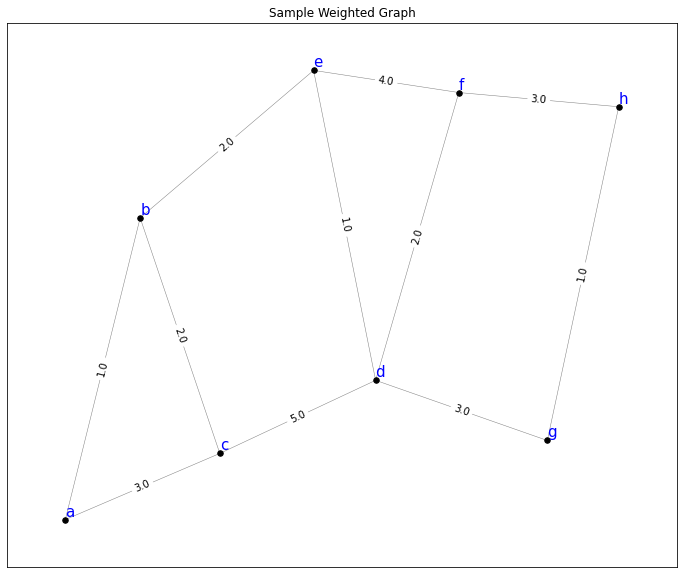

In [3]:
# Import the necessary python packages
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_weighted_edgelist("sample_weighted_graph.txt")

# Set your figure size
plt.figure(figsize=(12, 10))

# Set your pos
#pos = nx.kamada_kawai_layout(G)

pos = nx.spring_layout(G, seed=3113794652)
# Set your node options
node_options = {"node_color": "black", "node_size": 30}

# Set your edge options
edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

# Set your node label options
node_label_options = {"font_size": 15,
                      "font_color": "blue",
                      "verticalalignment": "bottom",
                      "horizontalalignment": "left"}


# Set your node label options
weights = {(u, v): z["weight"] for (u, v, z) in G.edges(data=True)}

edge_label_options = {"font_size": 10,
                      "font_color": "black",
                      "edge_labels": weights}

# Draw nodes
nx.draw_networkx_nodes(G, pos, **node_options)

# Draw edges
nx.draw_networkx_edges(G, pos, **edge_options)

# Draw your node labels
nx.draw_networkx_labels(G, pos, **node_label_options)

# Draw your edge labels
nx.draw_networkx_edge_labels(G, pos, **edge_label_options)


plt.title("Sample Weighted Graph")
plt.show()

---

Now that you understand what it means for vertices to be neighbors. We next introduce the notion of **neighborhoods**. That is, given a graph $G$ and a node $v$, the **open neighborhood** of $v$, denoted $N_G(v)$, is the set of all neighbors of $v$ in $G$. More specifically, 

$$N_G(v) = \{w : \{v, w\} \in E(G)\}$$

NetworkX has two simple ways to access this set (or list), namely ``G[v]`` and ``nx.neighbors(G, node)``. 

---

In [4]:
# The open neighborhood of node f
print(f"G['f']: {G['f']} \n")

for w in nx.neighbors(G, "f"):
    print(w)

G['f']: {'e': {'weight': 4.0}, 'd': {'weight': 2.0}, 'h': {'weight': 3.0}} 

e
d
h


---

The ``for`` loop in the above code cell can easily be implemented in a Python function. The following code cell illustrates how to do this

---

In [7]:
def open_neighborhood(G, node, return_set = False):
    if return_set:
        return set(nx.neighbors(G, node))
    else:
        return list(nx.neighbors(G, node))
    
print(f"The open neighborhood of d as a list: {open_neighborhood(G, 'd')} \n")

print(f"The open neighborhood of d as a set: {open_neighborhood(G, 'd', return_set = True)} \n")

The open neighborhood of d as a list: ['c', 'e', 'g', 'f'] 

The open neighborhood of d as a set: {'g', 'c', 'e', 'f'} 



---

Another important concept is that of the **closed neighborhood**. That is, given a graph $G$ and a node $v$, the closed neighborhood of $v$ in $G$ is:

$$
N_G[v] = N_G(v) \cup \{v\}
$$

Using the ``open_neighborhood`` code in the above cell, we next implement a closed neighborhood function in the following code cell. 

---

In [8]:
def closed_neighborhood(G, node, return_set = False):
    if return_set:
        return open_neighborhood(G, node, return_set = return_set).union(node)
    else:
        return list(open_neighborhood(G, node, return_set = True).union(node))
print("")
  
print(f"The closed neighborhood of f as a list: {closed_neighborhood(G, 'f')} \n")

print(f"The closed neighborhood of f as a set: {closed_neighborhood(G, 'f', return_set = True)} \n")


The closed neighborhood of f as a list: ['h', 'e', 'd', 'f'] 

The closed neighborhood of f as a set: {'h', 'e', 'd', 'f'} 



---

Having functions to find the open and closed neighborhoods of a given node makes drawing these neighborhoods in a graph easy as the following code cell shows. 

---

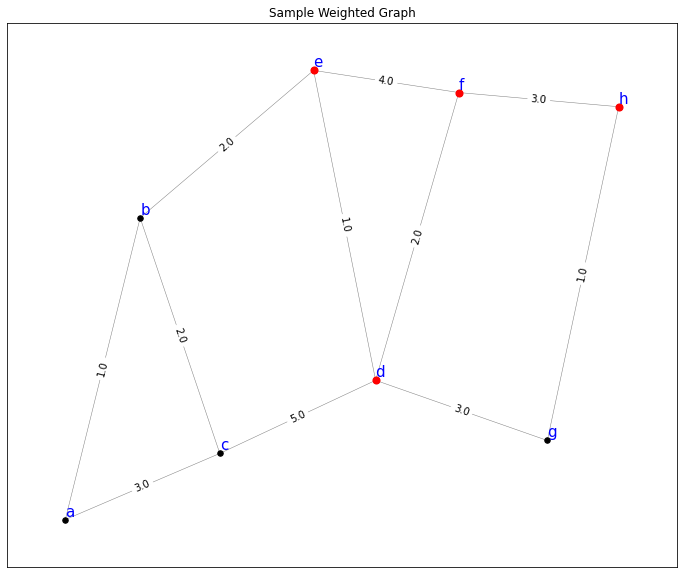

In [9]:
# Set your figure size
plt.figure(figsize=(12, 10))

# Set your pos
pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, seed=3113794652)
# Set your node options
node_options = {"node_color": "black", "node_size": 30}

# Set your edge options
edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

# Set your node label options
node_label_options = {"font_size": 15,
                      "font_color": "blue",
                      "verticalalignment": "bottom",
                      "horizontalalignment": "left"}


# Set your node label options
red_node_options = {"node_color": "red",
                    "node_size": 50,
                    "nodelist": closed_neighborhood(G, "f")}


# Set your node label options
weights = {(u, v): z["weight"] for (u, v, z) in G.edges(data=True)}

edge_label_options = {"font_size": 10,
                      "font_color": "black",
                      "edge_labels": weights}

# Draw nodes
nx.draw_networkx_nodes(G, pos, **node_options)

# Draw nodes
nx.draw_networkx_nodes(G, pos, **red_node_options)

# Draw edges
nx.draw_networkx_edges(G, pos, **edge_options)

# Draw your node labels
nx.draw_networkx_labels(G, pos, **node_label_options)

# Draw your edge labels
nx.draw_networkx_edge_labels(G, pos, **edge_label_options)


plt.title("Sample Weighted Graph")
plt.show()

---

Alongside the notion of neighbors, another equally important notion is that of **incident edges**. That is, given a graph $G$ and a node $v$, a given edge is incident with $v$ if $v$ is an endpoint of the edge in question. For example, if we wanted to know the edges incident with node $f$ in the current graph, we can find the edges incident with $f$ by implementing the following code cell. 

---

In [10]:
print("The edges incident with node f are:")
for e in G.edges:
    if "f" in e:
        print(e)

The edges incident with node f are:
('d', 'f')
('e', 'f')
('f', 'h')


---

The code implemented in the above cell can more efficiently be implemented with a simple function. The following code cell illustrates this. 

---

In [11]:
def incident_edges(G, node):
    temp_edges = []
    for e in G.edges:
        if node in e:
            temp_edges.append(e)
    return temp_edges


print("The edges incident with node f in G are:")
for e in incident_edges(G, "f"):
    print(e)

The edges incident with node f in G are:
('d', 'f')
('e', 'f')
('f', 'h')


---

Having a function to find the incident edges of a given node makes drawing these edges in a graph easy as the following code cell shows. 

---

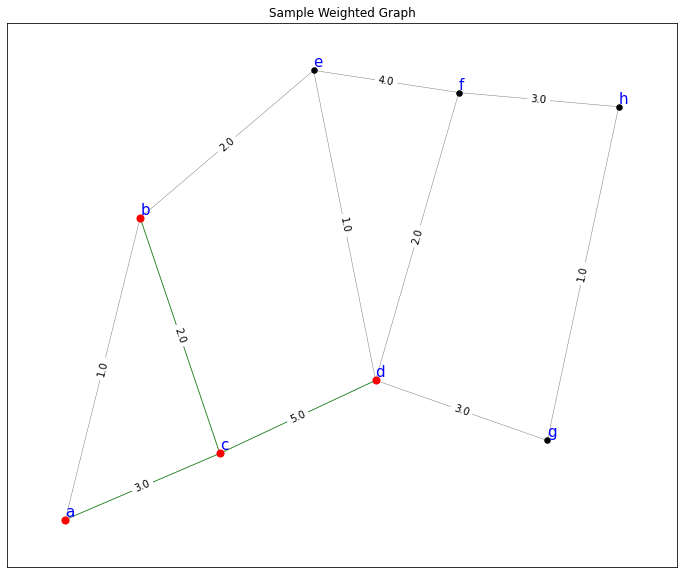

In [12]:
# Set your figure size
plt.figure(figsize=(12, 10))

# Set your pos
pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, seed=3113794652)
# Set your node options
node_options = {"node_color": "black", "node_size": 30}

# Set your edge options
edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

# Set your node label options
node_label_options = {"font_size": 15,
                      "font_color": "blue",
                      "verticalalignment": "bottom",
                      "horizontalalignment": "left"}


# Set your node label options
red_node_options = {"node_color": "red",
                    "node_size": 50,
                    "nodelist": closed_neighborhood(G, "c")}


# Set your edge options
red_edge_options = {"width": .85, 
                    "alpha": .75, 
                    "edge_color": "green",
                    "edgelist": incident_edges(G, "c")}


# Set your node label options
weights = {(u, v): z["weight"] for (u, v, z) in G.edges(data=True)}

edge_label_options = {"font_size": 10,
                      "font_color": "black",
                      "edge_labels": weights}

# Draw nodes
nx.draw_networkx_nodes(G, pos, **node_options)

# Draw nodes
nx.draw_networkx_nodes(G, pos, **red_node_options)

# Draw edges
nx.draw_networkx_edges(G, pos, **edge_options)

# Draw edges
nx.draw_networkx_edges(G, pos, **red_edge_options)

# Draw your node labels
nx.draw_networkx_labels(G, pos, **node_label_options)

# Draw your edge labels
nx.draw_networkx_edge_labels(G, pos, **edge_label_options)


plt.title("Sample Weighted Graph")
plt.show()

---

As you can see in the above figure, node $f$ has 3 neighbors. This is called the **degree** of $f$. Formally, given a graph $G$ and a node $v \in V(G)$, the degree of $v$, denoted $d_G(v)$, is the number of neighbors of $v$ in $G$. This can be accessed through ``nx.degree(G, node)``, and is shown in the following code cell. 


---

In [13]:
nx.degree(G, "f")

3

In [14]:
G = nx.random_internet_as_graph(500)

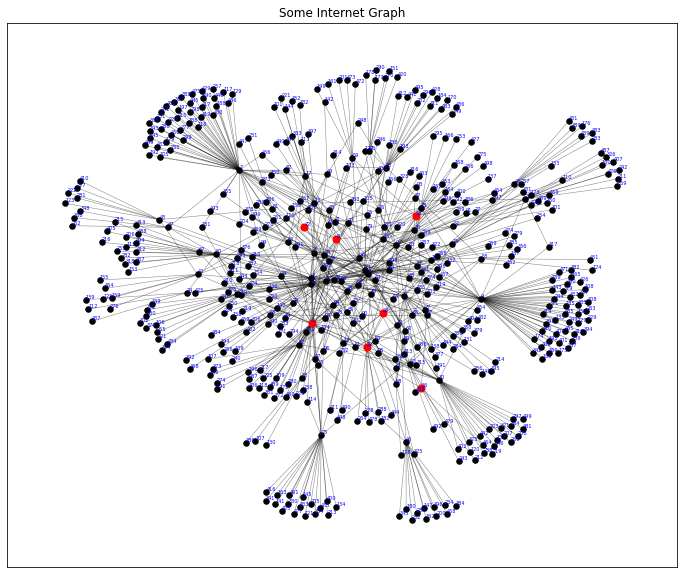

In [15]:
# Set your figure size
plt.figure(figsize=(12, 10))

# Set your pos
#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, seed=3113794652)
# Set your node options
node_options = {"node_color": "black", "node_size": 30}

# Set your edge options
edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

# Set your node label options
node_label_options = {"font_size": 5,
                      "font_color": "blue",
                      "verticalalignment": "bottom",
                      "horizontalalignment": "left"}


# Set your node label options
red_node_options = {"node_color": "red",
                    "node_size": 50,
                    "nodelist": list(nx.neighbors(G, 19))}


# Set your edge options
#red_edge_options = {"width": .85, 
#                    "alpha": .75, 
#                    "edge_color": "green",
#                    "edgelist": incident_edges(G, "f")}


# Set your node label options
#weights = {(u, v): z["weight"] for (u, v, z) in G.edges(data=True)}

edge_label_options = {"font_size": 10,
                      "font_color": "black",
                      "edge_labels": weights}

# Draw nodes
nx.draw_networkx_nodes(G, pos, **node_options)

# Draw nodes
nx.draw_networkx_nodes(G, pos, **red_node_options)

# Draw edges
nx.draw_networkx_edges(G, pos, **edge_options)

# Draw edges
#nx.draw_networkx_edges(G, pos, **red_edge_options)

# Draw your node labels
nx.draw_networkx_labels(G, pos, **node_label_options)

# Draw your edge labels
#nx.draw_networkx_edge_labels(G, pos, **edge_label_options)


plt.title("Some Internet Graph")
plt.show()

In [16]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [17]:
node_and_degree = [(node, nx.degree(G, node)) for node in G.nodes]

In [18]:
node_and_degree

[(0, 27),
 (1, 26),
 (2, 42),
 (3, 20),
 (4, 36),
 (5, 24),
 (6, 27),
 (7, 57),
 (8, 11),
 (9, 62),
 (10, 17),
 (11, 7),
 (12, 22),
 (13, 16),
 (14, 14),
 (15, 12),
 (16, 7),
 (17, 12),
 (18, 18),
 (19, 7),
 (20, 10),
 (21, 13),
 (22, 21),
 (23, 8),
 (24, 6),
 (25, 4),
 (26, 9),
 (27, 4),
 (28, 9),
 (29, 15),
 (30, 29),
 (31, 2),
 (32, 14),
 (33, 8),
 (34, 26),
 (35, 13),
 (36, 2),
 (37, 10),
 (38, 6),
 (39, 9),
 (40, 6),
 (41, 6),
 (42, 10),
 (43, 8),
 (44, 8),
 (45, 9),
 (46, 14),
 (47, 6),
 (48, 4),
 (49, 7),
 (50, 20),
 (51, 5),
 (52, 7),
 (53, 21),
 (54, 5),
 (55, 11),
 (56, 6),
 (57, 4),
 (58, 5),
 (59, 10),
 (60, 5),
 (61, 5),
 (62, 5),
 (63, 7),
 (64, 4),
 (65, 5),
 (66, 6),
 (67, 6),
 (68, 7),
 (69, 6),
 (70, 9),
 (71, 7),
 (72, 3),
 (73, 3),
 (74, 6),
 (75, 24),
 (76, 7),
 (77, 4),
 (78, 10),
 (79, 4),
 (80, 2),
 (81, 3),
 (82, 3),
 (83, 2),
 (84, 2),
 (85, 4),
 (86, 3),
 (87, 2),
 (88, 2),
 (89, 3),
 (90, 3),
 (91, 1),
 (92, 3),
 (93, 2),
 (94, 5),
 (95, 4),
 (96, 3),
 (97, 

In [19]:
node_and_degree.sort(key = lambda x: x[1])

In [20]:
node_and_degree

[(91, 1),
 (101, 1),
 (105, 1),
 (106, 1),
 (107, 1),
 (108, 1),
 (109, 1),
 (110, 1),
 (111, 1),
 (112, 1),
 (113, 1),
 (115, 1),
 (116, 1),
 (117, 1),
 (118, 1),
 (119, 1),
 (120, 1),
 (121, 1),
 (122, 1),
 (123, 1),
 (124, 1),
 (125, 1),
 (126, 1),
 (127, 1),
 (128, 1),
 (129, 1),
 (130, 1),
 (131, 1),
 (132, 1),
 (133, 1),
 (134, 1),
 (135, 1),
 (136, 1),
 (137, 1),
 (138, 1),
 (139, 1),
 (140, 1),
 (141, 1),
 (142, 1),
 (143, 1),
 (144, 1),
 (145, 1),
 (146, 1),
 (147, 1),
 (148, 1),
 (149, 1),
 (150, 1),
 (151, 1),
 (152, 1),
 (153, 1),
 (154, 1),
 (155, 1),
 (156, 1),
 (157, 1),
 (158, 1),
 (159, 1),
 (160, 1),
 (161, 1),
 (162, 1),
 (163, 1),
 (164, 1),
 (165, 1),
 (166, 1),
 (167, 1),
 (168, 1),
 (169, 1),
 (170, 1),
 (171, 1),
 (172, 1),
 (173, 1),
 (174, 1),
 (175, 1),
 (176, 1),
 (177, 1),
 (178, 1),
 (179, 1),
 (180, 1),
 (182, 1),
 (183, 1),
 (184, 1),
 (185, 1),
 (186, 1),
 (187, 1),
 (188, 1),
 (189, 1),
 (190, 1),
 (191, 1),
 (192, 1),
 (193, 1),
 (194, 1),
 (195, 1),
